# <center> Locally Linear Embedding using Crabs dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import LocallyLinearEmbedding
import warnings 
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [2]:
data = pd.read_csv('./crabs.csv')
data.head(10)

sp sex  index    FL    RW    CL    CW    BD
0  B   M      1   8.1   6.7  16.1  19.0   7.0
1  B   M      2   8.8   7.7  18.1  20.8   7.4
2  B   M      3   9.2   7.8  19.0  22.4   7.7
3  B   M      4   9.6   7.9  20.1  23.1   8.2
4  B   M      5   9.8   8.0  20.3  23.0   8.2
5  B   M      6  10.8   9.0  23.0  26.5   9.8
6  B   M      7  11.1   9.9  23.8  27.1   9.8
7  B   M      8  11.6   9.1  24.5  28.4  10.4
8  B   M      9  11.8   9.6  24.2  27.8   9.7
9  B   M     10  11.8  10.5  25.2  29.3  10.3

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp      200 non-null    object 
 1   sex     200 non-null    object 
 2   index   200 non-null    int64  
 3   FL      200 non-null    float64
 4   RW      200 non-null    float64
 5   CL      200 non-null    float64
 6   CW      200 non-null    float64
 7   BD      200 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


In [4]:
data.describe()

index          FL         RW          CL          CW          BD
count  200.000000  200.000000  200.00000  200.000000  200.000000  200.000000
mean    25.500000   15.583000   12.73850   32.105500   36.414500   14.030500
std     14.467083    3.495325    2.57334    7.118983    7.871955    3.424772
min      1.000000    7.200000    6.50000   14.700000   17.100000    6.100000
25%     13.000000   12.900000   11.00000   27.275000   31.500000   11.400000
50%     25.500000   15.550000   12.80000   32.100000   36.800000   13.900000
75%     38.000000   18.050000   14.30000   37.225000   42.000000   16.600000
max     50.000000   23.100000   20.20000   47.600000   54.600000   21.600000

In [5]:
data.shape

(200, 8)

In [6]:
data.isnull().mean()*100

sp       0.0
sex      0.0
index    0.0
FL       0.0
RW       0.0
CL       0.0
CW       0.0
BD       0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop(columns='index', inplace=True)

In [9]:
data.columns

Index(['sp', 'sex', 'FL', 'RW', 'CL', 'CW', 'BD'], dtype='object')

In [10]:
data.rename(columns={'sp':'Species', 'FL':'Frontal_Lobe', 'RW':'Rear_Width',
                     'CL':'Carapace_Midline', 'CW':'Maximum_Width',
                     'BD':'Body_Depth'}, inplace=True)
data.head()

Species sex  Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  \
0       B   M           8.1         6.7              16.1           19.0   
1       B   M           8.8         7.7              18.1           20.8   
2       B   M           9.2         7.8              19.0           22.4   
3       B   M           9.6         7.9              20.1           23.1   
4       B   M           9.8         8.0              20.3           23.0   

   Body_Depth  
0         7.0  
1         7.4  
2         7.7  
3         8.2  
4         8.2

In [11]:
data.Species.unique()

array(['B', 'O'], dtype=object)

In [12]:
data.Species.replace({'B':'Blue', 'O':'Orange'}, inplace=True)
data.sex.replace({'M':'Male', 'F':'Female'}, inplace=True)
data.head()

Species   sex  Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  \
0    Blue  Male           8.1         6.7              16.1           19.0   
1    Blue  Male           8.8         7.7              18.1           20.8   
2    Blue  Male           9.2         7.8              19.0           22.4   
3    Blue  Male           9.6         7.9              20.1           23.1   
4    Blue  Male           9.8         8.0              20.3           23.0   

   Body_Depth  
0         7.0  
1         7.4  
2         7.7  
3         8.2  
4         8.2

<li> Seperate the 200 crabs into four classes, given by the 2x2 configuration for sex (Male & Female) and species (Blue & Orange)

In [13]:
data['Class'] = data.Species + data.sex

In [14]:
data.head(10)

Species   sex  Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  \
0    Blue  Male           8.1         6.7              16.1           19.0   
1    Blue  Male           8.8         7.7              18.1           20.8   
2    Blue  Male           9.2         7.8              19.0           22.4   
3    Blue  Male           9.6         7.9              20.1           23.1   
4    Blue  Male           9.8         8.0              20.3           23.0   
5    Blue  Male          10.8         9.0              23.0           26.5   
6    Blue  Male          11.1         9.9              23.8           27.1   
7    Blue  Male          11.6         9.1              24.5           28.4   
8    Blue  Male          11.8         9.6              24.2           27.8   
9    Blue  Male          11.8        10.5              25.2           29.3   

   Body_Depth     Class  
0         7.0  BlueMale  
1         7.4  BlueMale  
2         7.7  BlueMale  
3         8.2  BlueMale  
4         8.2  BlueMale  
5         9.8  BlueMale  
6         9.8  BlueMale  
7        10.4  BlueMale  
8         9.7  BlueMale  
9        10.3  BlueMale

#### EDA

#### Univariate analysis

#### Histograms

In [15]:
data_EDA = data.select_dtypes(float)
data_EDA

Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  Body_Depth
0             8.1         6.7              16.1           19.0         7.0
1             8.8         7.7              18.1           20.8         7.4
2             9.2         7.8              19.0           22.4         7.7
3             9.6         7.9              20.1           23.1         8.2
4             9.8         8.0              20.3           23.0         8.2
..            ...         ...               ...            ...         ...
195          21.4        18.0              41.2           46.2        18.7
196          21.7        17.1              41.7           47.2        19.6
197          21.9        17.2              42.6           47.4        19.5
198          22.5        17.2              43.0           48.7        19.8
199          23.1        20.2              46.2           52.5        21.1

[200 rows x 5 columns]

### Histogram

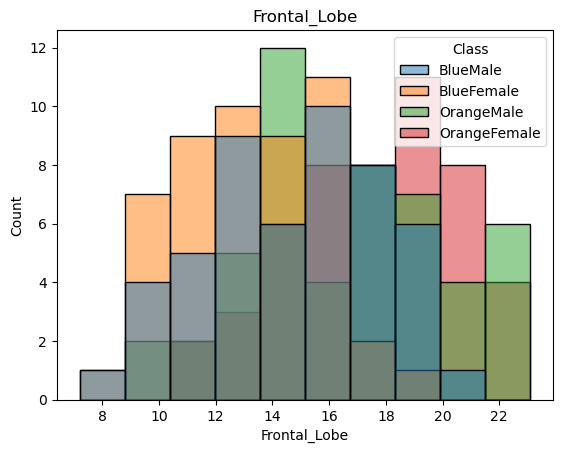

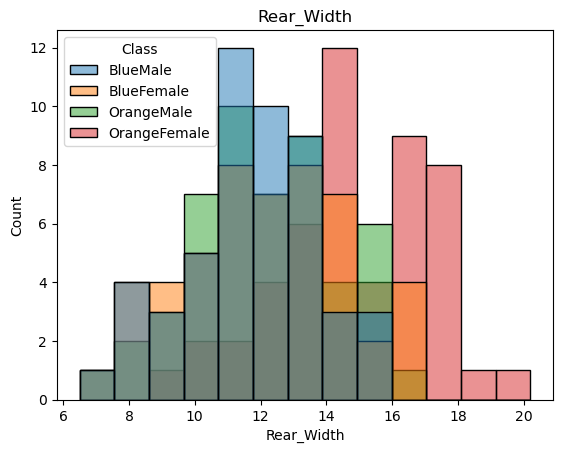

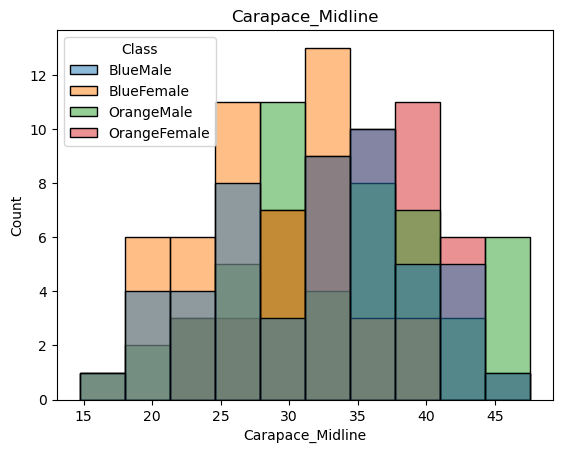

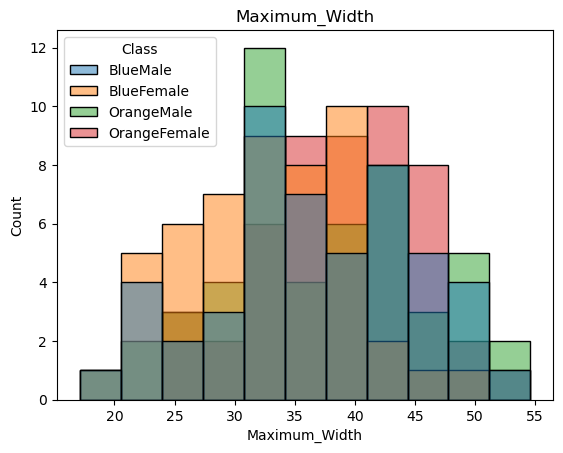

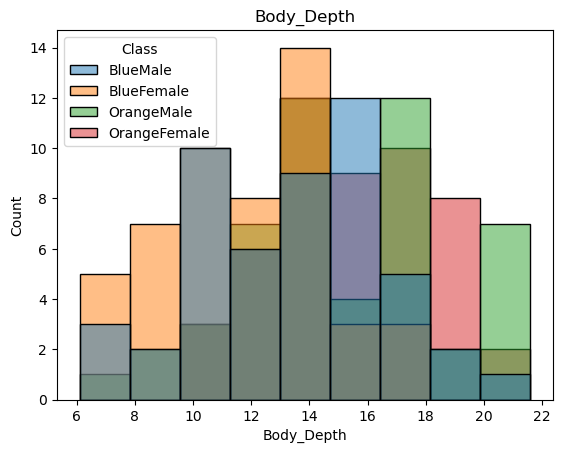

In [16]:
for i in data_EDA.columns:
    sns.histplot(data=data, x=i, hue='Class')
    plt.title(i)
    plt.show()

### Box plot

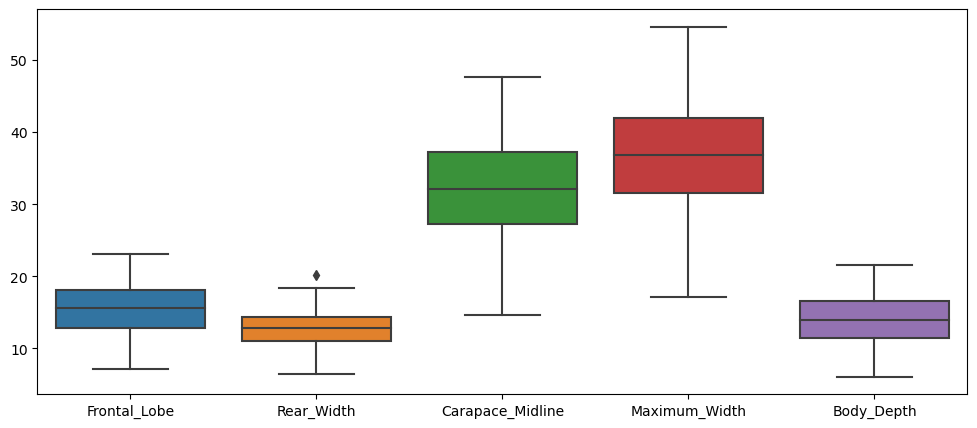

In [17]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=data_EDA)
plt.show()

#### Behaviour of different classes

In [18]:
data.columns

Index(['Species', 'sex', 'Frontal_Lobe', 'Rear_Width', 'Carapace_Midline',
       'Maximum_Width', 'Body_Depth', 'Class'],
      dtype='object')

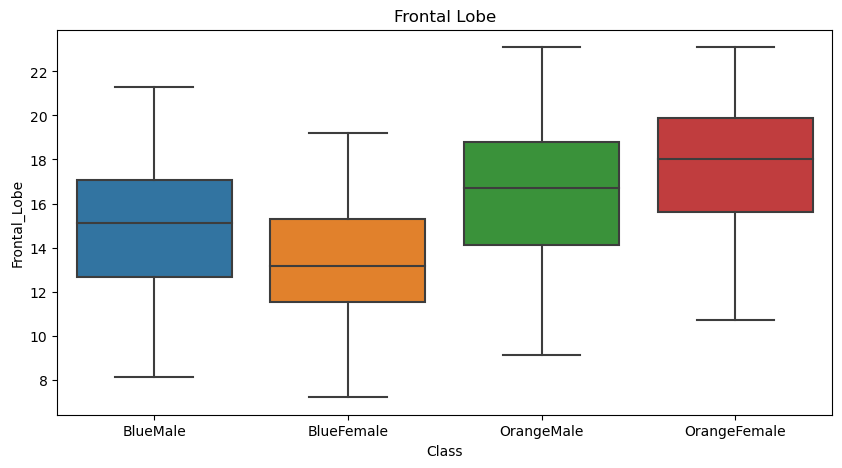

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, y='Frontal_Lobe', x='Class')
plt.title('Frontal Lobe')
plt.show()

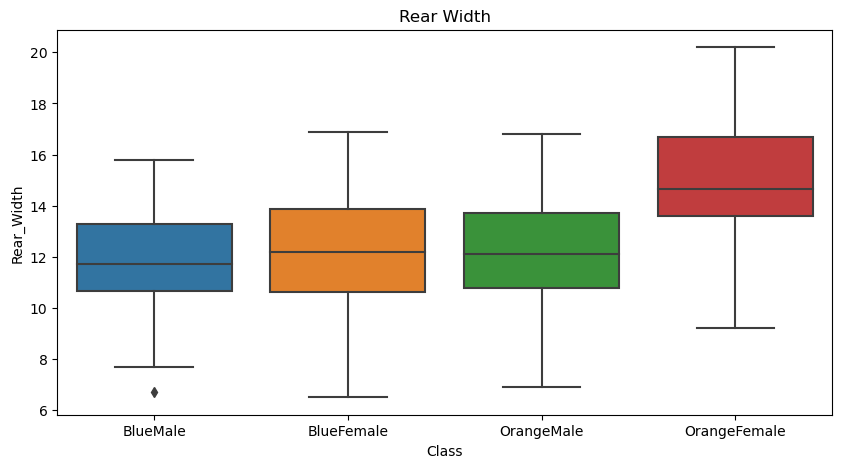

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, y='Rear_Width', x='Class')
plt.title('Rear Width')
plt.show()

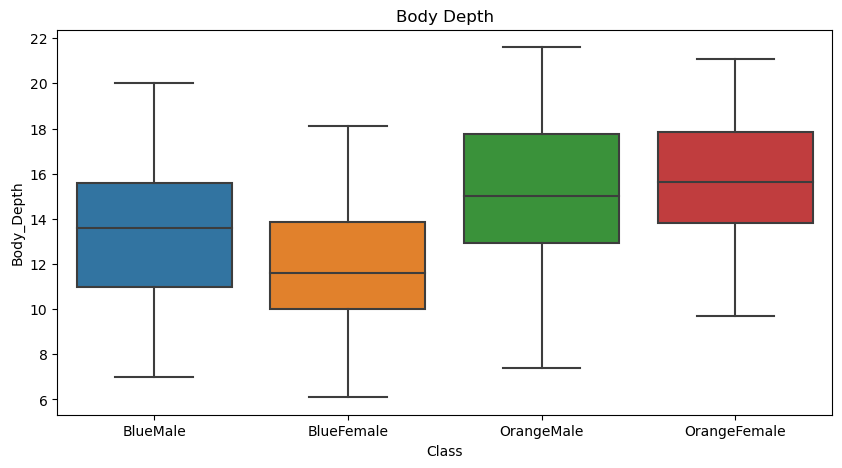

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, y='Body_Depth', x='Class')
plt.title('Body Depth')
plt.show()

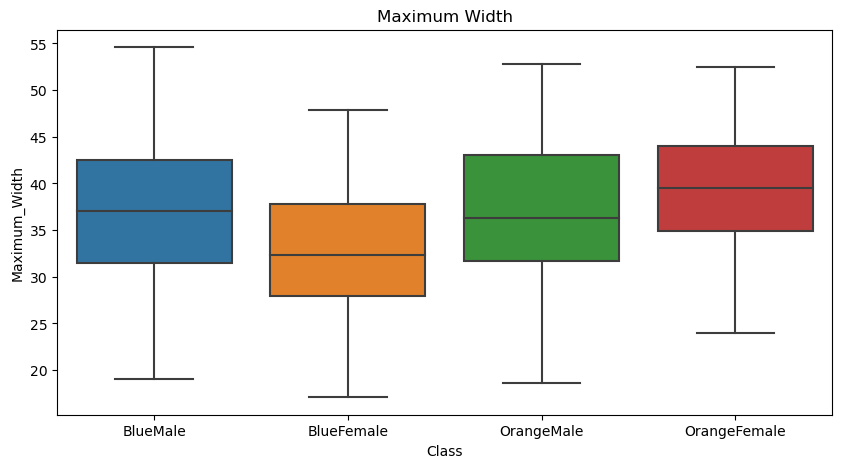

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, y='Maximum_Width', x='Class')
plt.title('Maximum Width')
plt.show()

#### Multivariate analysis

#### Pairplot

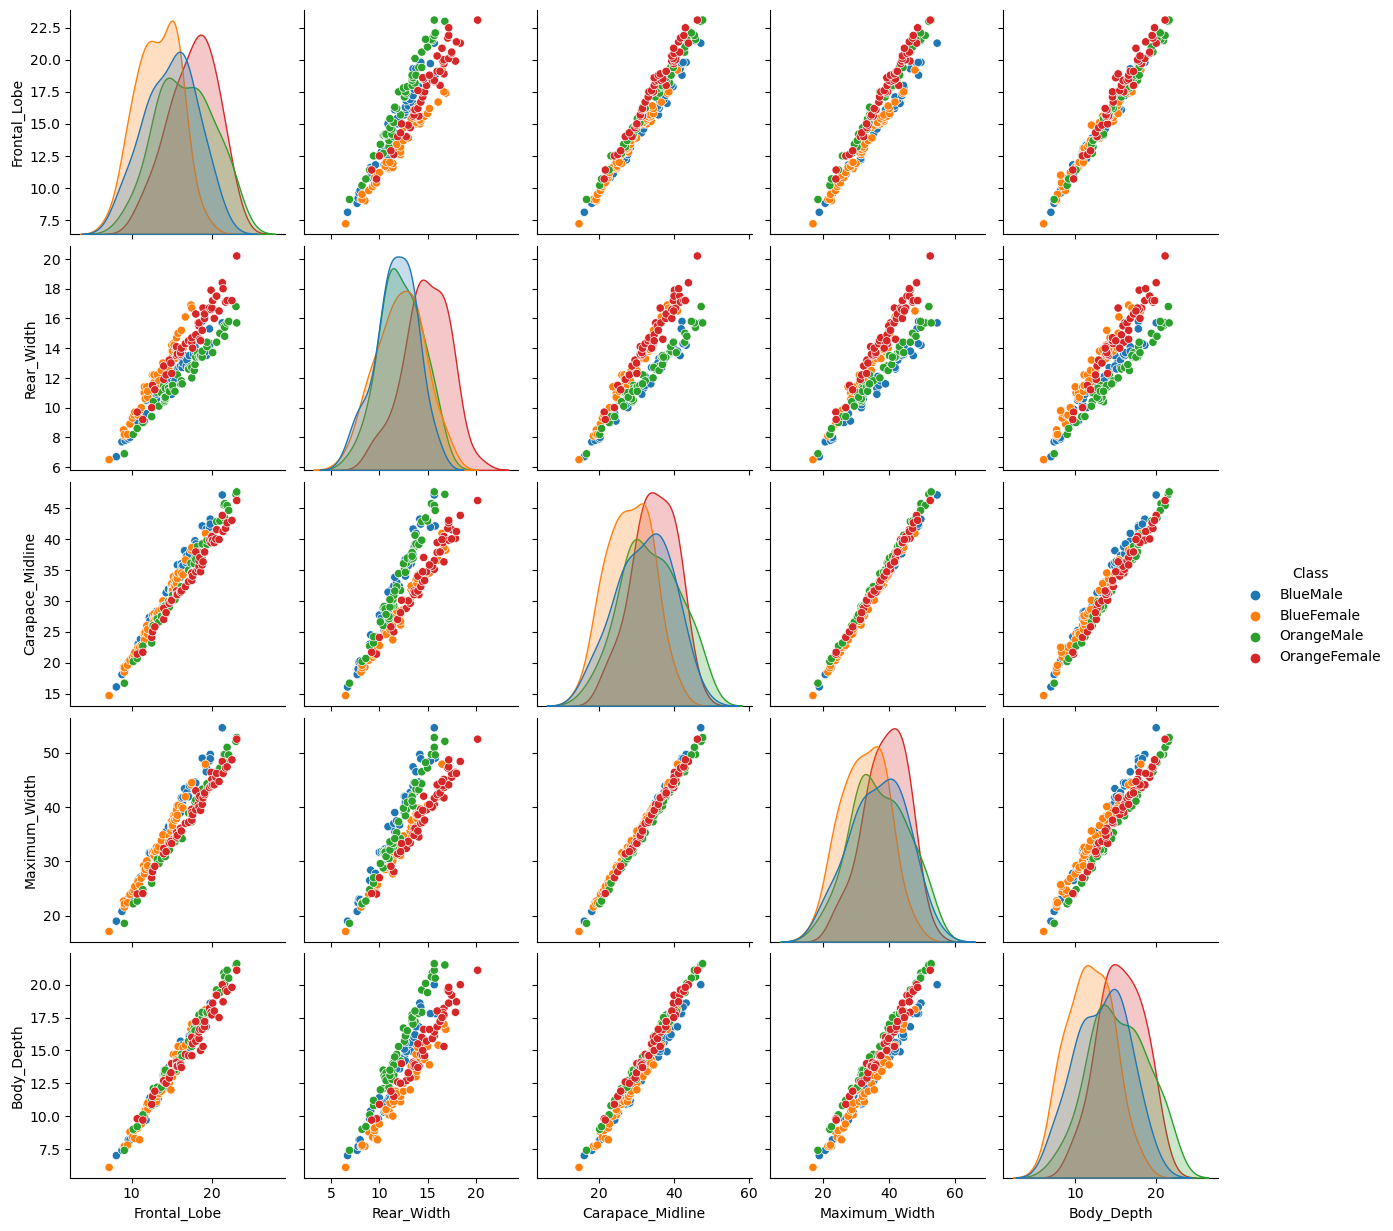

In [23]:
sns.pairplot(data=data, hue='Class')
plt.show()

In [24]:
data_MinMax = data.copy(deep=True)

In [25]:
data_EDA.columns

Index(['Frontal_Lobe', 'Rear_Width', 'Carapace_Midline', 'Maximum_Width',
       'Body_Depth'],
      dtype='object')

In [26]:
data_columns = ['Frontal_Lobe', 'Rear_Width', 'Carapace_Midline', 'Maximum_Width',
        'Body_Depth']

In [27]:
data_MinMax[data_columns] = MinMaxScaler().fit_transform(data[data_columns])

In [28]:
data_MinMax.head()

Species   sex  Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  \
0    Blue  Male      0.056604    0.014599          0.042553       0.050667   
1    Blue  Male      0.100629    0.087591          0.103343       0.098667   
2    Blue  Male      0.125786    0.094891          0.130699       0.141333   
3    Blue  Male      0.150943    0.102190          0.164134       0.160000   
4    Blue  Male      0.163522    0.109489          0.170213       0.157333   

   Body_Depth     Class  
0    0.058065  BlueMale  
1    0.083871  BlueMale  
2    0.103226  BlueMale  
3    0.135484  BlueMale  
4    0.135484  BlueMale

In [29]:
data_MinMax.tail()

Species     sex  Frontal_Lobe  Rear_Width  Carapace_Midline  \
195  Orange  Female      0.893082    0.839416          0.805471   
196  Orange  Female      0.911950    0.773723          0.820669   
197  Orange  Female      0.924528    0.781022          0.848024   
198  Orange  Female      0.962264    0.781022          0.860182   
199  Orange  Female      1.000000    1.000000          0.957447   

     Maximum_Width  Body_Depth         Class  
195       0.776000    0.812903  OrangeFemale  
196       0.802667    0.870968  OrangeFemale  
197       0.808000    0.864516  OrangeFemale  
198       0.842667    0.883871  OrangeFemale  
199       0.944000    0.967742  OrangeFemale

In [30]:
data_MinMax.describe()

Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  Body_Depth
count    200.000000  200.000000        200.000000     200.000000  200.000000
mean       0.527233    0.455365          0.529043       0.515053    0.511645
std        0.219832    0.187835          0.216382       0.209919    0.220953
min        0.000000    0.000000          0.000000       0.000000    0.000000
25%        0.358491    0.328467          0.382219       0.384000    0.341935
50%        0.525157    0.459854          0.528875       0.525333    0.503226
75%        0.682390    0.569343          0.684650       0.664000    0.677419
max        1.000000    1.000000          1.000000       1.000000    1.000000

#### Initializing Locally Linear Embedding with 2 components

In [31]:
LLE = LocallyLinearEmbedding(n_components=2, n_neighbors=15)

In [32]:
data_LLE = LLE.fit_transform(data_MinMax[data_columns])

#### Reconstruction error

In [33]:
LLE.reconstruction_error_

2.1530288014839025e-06

* We can see that the seperation is good as the value is very low.

In [34]:
data_MinMax[['LLE1', 'LLE2']] = data_LLE

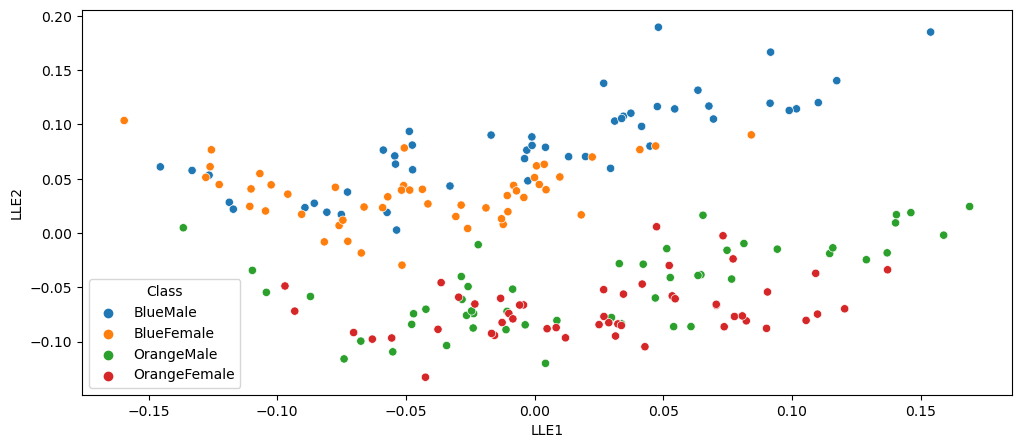

In [35]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=data_MinMax.LLE1, y=data_MinMax.LLE2, hue=data_MinMax.Class)
plt.show()

#### Initializing Locally Linear Embedding with 3 components

In [36]:
LLE_3 = LocallyLinearEmbedding(n_components=3, n_neighbors=15)

In [37]:
data_LLE_3 = LLE_3.fit_transform(data_MinMax[data_columns])

In [38]:
data_MinMax[['lle1', 'lle2', 'lle3']] = data_LLE_3

#### Reconstruction error

In [39]:
LLE_3.reconstruction_error_

1.5214133596769319e-05

In [40]:
data_MinMax.head()

Species   sex  Frontal_Lobe  Rear_Width  Carapace_Midline  Maximum_Width  \
0    Blue  Male      0.056604    0.014599          0.042553       0.050667   
1    Blue  Male      0.100629    0.087591          0.103343       0.098667   
2    Blue  Male      0.125786    0.094891          0.130699       0.141333   
3    Blue  Male      0.150943    0.102190          0.164134       0.160000   
4    Blue  Male      0.163522    0.109489          0.170213       0.157333   

   Body_Depth     Class      LLE1      LLE2      lle1      lle2      lle3  
0    0.058065  BlueMale -0.145449  0.060973 -0.145449  0.060973  0.092920  
1    0.083871  BlueMale -0.133111  0.057664 -0.133111  0.057664  0.059493  
2    0.103226  BlueMale -0.126506  0.053316 -0.126506  0.053316  0.053484  
3    0.135484  BlueMale -0.118650  0.028331 -0.118650  0.028331  0.059578  
4    0.135484  BlueMale -0.117088  0.022013 -0.117088  0.022013  0.060005

In [41]:
px.scatter_3d(data_frame=data_MinMax, x='lle1', y='lle2', z='lle3', color='Class')